**Newton Raphson Root Finding Method**

In [1]:
import numpy as np
import scipy.stats as st
import math
import time

def ImpliedVolatilityNR(CP,Cm,S,K,tau,r):
  epsilon = 0.000001 # initial error
  maxIterations = 1000
  sigNRIV = []
  count = []
  t1 = []
  for t in range(0, len(K)):
    ccNRM = 0
    error = 1
    i = 0
    sigma = math.sqrt(2/tau * abs(np.log(S/K[t])+r*tau))
    st1 = time.time()
    while error > epsilon and i < maxIterations:
      d1 = (np.log(S / float(K[t])) + (r + 0.5 * np.power(sigma,2.0)) * tau) / float(sigma * np.sqrt(tau))
      d2 = d1 - sigma * np.sqrt(tau)
      if str(CP).lower()=="c":
        optPrice = st.norm.cdf(d1) * S - st.norm.cdf(d2) * K[t] * np.exp(-r * tau)
      elif str(CP).lower()=="p":
        optPrice = st.norm.cdf(-d2) * K[t] * np.exp(-r * tau) - st.norm.cdf(-d1)*S
      vega = K[t] * np.exp(-r * tau) * st.norm.pdf(d2) * np.sqrt(tau)
      g = optPrice - Cm[t]
      g_prim = vega
      sigma = sigma - g / g_prim
      error=abs(g)
      ccNRM = ccNRM + 1
      i = i + 1
    et = time.time()
    tt = et - st1
    t1.append(tt)
    sigNRIV.append(sigma)
    count.append(ccNRM)
  return count, sigNRIV, t1

**Bisection Method**

In [2]:
import numpy as np
import scipy.stats as st
import math

def ComputeBSM(CP,S,K,sigma,tau,r):
  d1 = (np.log(S / float(K)) + (r + 0.5 * np.power(sigma,2.0)) * tau) / float(sigma * np.sqrt(tau))
  d2 = d1 - sigma * np.sqrt(tau)
  if str(CP).lower()=="c":
    value = st.norm.cdf(d1) * S - st.norm.cdf(d2) * K * np.exp(-r * tau)
  elif str(CP).lower()=="p":
    value = st.norm.cdf(-d2) * K * np.exp(-r * tau) - st.norm.cdf(-d1)*S
  return value

def ImpliedVolatilityBM(CP,Cm,S,K,tau,r):
  epsilon = 0.000001 # initial error
  maxIterations = 1000
  sigBIV = []
  count = []
  t1 = []
  l = []
  u = []
  for t in range(0, len(K)):
    ccBM = 0
    error = 1
    i = 0
    xl = 0
    xu = 5
    st1 = time.time()
    while error > epsilon and i < maxIterations:
      sigma = (xl + xu)/2
      optPrice = ComputeBSM(CP,S,K[t],sigma,tau,r)
      fxl = ComputeBSM(CP,S,K[t],xl,tau,r)
      if (fxl - Cm[t]) * (optPrice - Cm[t]) < 0:
        xu = sigma
      else:
        xl = sigma
      error=abs(optPrice - Cm[t])
      ccBM = ccBM + 1
      i = i + 1
    et = time.time()
    tt = et - st1
    t1.append(tt)
    l.append(xl)
    u.append(xu)
    sigBIV.append(sigma)
    count.append(ccBM)
  return count, sigBIV, t1, l, u

**Trisection Method**

In [3]:
import numpy as np
import scipy.stats as st
import math

def ComputeBSM(CP,S,K,sigma,tau,r):
  d1 = (np.log(S / float(K)) + (r + 0.5 * np.power(sigma,2.0)) * tau) / float(sigma * np.sqrt(tau))
  d2 = d1 - sigma * np.sqrt(tau)
  if str(CP).lower()=="c":
    value = st.norm.cdf(d1) * S - st.norm.cdf(d2) * K * np.exp(-r * tau)
  elif str(CP).lower()=="p":
    value = st.norm.cdf(-d2) * K * np.exp(-r * tau) - st.norm.cdf(-d1)*S
  return value

def ImpliedVolatilityTrM(CP,Cm,S,K,tau,r):
  epsilon = 0.000001 # initial error
  maxIterations = 1000
  sigTIV = []
  count = []
  t1 = []
  l = []
  u = []
  for t in range(0, len(K)):
    ccTM = 0
    error = 1
    i = 0
    a = 0
    b = 5
    st1 = time.time()
    while True:
      ccTM = ccTM + 1
      i = i + 1
      x1 = (b + 2*a)/3
      x2 = (2*b + a)/3
      fx1 = ComputeBSM(CP,S,K[t],x1,tau,r) - Cm[t]
      fx2 = ComputeBSM(CP,S,K[t],x2,tau,r) - Cm[t]
      if abs(fx1) < abs(fx2):
        x = x1
      else:
        x = x2
      fx = ComputeBSM(CP,S,K[t],x,tau,r) - Cm[t]
      fa = ComputeBSM(CP,S,K[t],a,tau,r) - Cm[t]
      if abs(fx) <= epsilon:
        sigTIV.append(x)
        count.append(ccTM)
        et = time.time()
        tt = et - st1
        t1.append(tt)
        l.append(a)
        u.append(b)
        break
      elif fa * fx1 < 0:
        b = x1
      elif fx1 * fx2 < 0:
        a = x1
        b = x2
      else:
        a = x2
  return count, sigTIV, t1, l, u

**False Position Method**

In [4]:
import numpy as np
import scipy.stats as st
import math

def ComputeBSM(CP,S,K,sigma,tau,r):
  d1 = (np.log(S / float(K)) + (r + 0.5 * np.power(sigma,2.0)) * tau) / float(sigma * np.sqrt(tau))
  d2 = d1 - sigma * np.sqrt(tau)
  if str(CP).lower()=="c":
    value = st.norm.cdf(d1) * S - st.norm.cdf(d2) * K * np.exp(-r * tau)
  elif str(CP).lower()=="p":
    value = st.norm.cdf(-d2) * K * np.exp(-r * tau) - st.norm.cdf(-d1)*S
  return value

def ImpliedVolatilityRfM(CP,Cm,S,K,tau,r):
  epsilon = 0.000001 # initial error
  maxIterations = 1000
  sigRfIV = []
  count = []
  t1 = []
  l = []
  u = []
  for t in range(0, len(K)):
    ccRfM = 0
    error = 1
    i = 0
    a = 0
    b = 5
    st1 = time.time()
    while True:

      ccRfM = ccRfM + 1
      fa = ComputeBSM(CP,S,K[t],a,tau,r) - Cm[t]
      fb = ComputeBSM(CP,S,K[t],b,tau,r) - Cm[t]
      x = a - (fa*(b-a))/(fb - fa)
      fx = ComputeBSM(CP,S,K[t],x,tau,r) - Cm[t]
      if abs(fx) <= epsilon:
        sigRfIV.append(x)
        count.append(ccRfM)
        et = time.time()
        tt = et - st1
        t1.append(tt)
        l.append(a)
        u.append(b)
        break
      elif fa * fx < 0:
        b = x
      else:
        a = x
  return count, sigRfIV, t1, l, u

**Hybrid Bisection and False Position Method**

In [5]:
import numpy as np
import scipy.stats as st
import math

def ComputeBSM(CP,S,K,sigma,tau,r):
  d1 = (np.log(S / float(K)) + (r + 0.5 * np.power(sigma,2.0)) * tau) / float(sigma * np.sqrt(tau))
  d2 = d1 - sigma * np.sqrt(tau)
  if str(CP).lower()=="c":
    value = st.norm.cdf(d1) * S - st.norm.cdf(d2) * K * np.exp(-r * tau)
  elif str(CP).lower()=="p":
    value = st.norm.cdf(-d2) * K * np.exp(-r * tau) - st.norm.cdf(-d1)*S
  return value

def ImpliedVolatilityBRfM(CP,Cm,S,K,tau,r):
  epsilon = 0.000001 # initial error
  sigBRfIV = []
  count = []
  t1 = []
  l = []
  u = []
  for t in range(0, len(K)):
    ccBRfM = 0
    error = 1
    i = 0
    a = 0
    b = 5
    a1 = a2 = a
    b1 = b2 = b
    st1 = time.time()
    while True:
      ccBRfM = ccBRfM + 1
      xB = (a+b)/2
      fa = ComputeBSM(CP,S,K[t],a,tau,r) - Cm[t]
      fb = ComputeBSM(CP,S,K[t],b,tau,r) - Cm[t]
      xF =  a - (fa*(b-a))/(fb - fa)
      fxB = ComputeBSM(CP,S,K[t],xB,tau,r) - Cm[t]
      fxF = ComputeBSM(CP,S,K[t],xF,tau,r) - Cm[t]
      if abs(fxB) < abs(fxF):
        x = xB
      else:
        x = xF
      fx = ComputeBSM(CP,S,K[t],x,tau,r) - Cm[t]
      if abs(fx) <= epsilon:
        sigBRfIV.append(x)
        count.append(ccBRfM)
        et=time.time()
        tt = et - st1
        t1.append(tt)
        l.append(a)
        u.append(b)
        break
      if fa * fxB < 0:
        b1 = xB
      else:
        a1 = xB
      if fa * fxF < 0:
        b2 = xF
      else:
        a2 = xF
      a = max(a1,a2)
      b = min(b1,b2)
  return count, sigBRfIV, t1, l, u

**Hybrid Trisection and False Position Method**

In [6]:
import numpy as np
import scipy.stats as st
import math

def ComputeBSM(CP,S,K,sigma,tau,r):
  d1 = (np.log(S / float(K)) + (r + 0.5 * np.power(sigma,2.0)) * tau) / float(sigma * np.sqrt(tau))
  d2 = d1 - sigma * np.sqrt(tau)
  if str(CP).lower()=="c":
    value = st.norm.cdf(d1) * S - st.norm.cdf(d2) * K * np.exp(-r * tau)
  elif str(CP).lower()=="p":
    value = st.norm.cdf(-d2) * K * np.exp(-r * tau) - st.norm.cdf(-d1)*S
  return value

def ImpliedVolatilityTRfM(CP,Cm,S,K,tau,r):
  epsilon = 0.000001 # initial error
  sigTRfIV = []
  count = []
  t1 = []
  l = []
  u = []
  for t in range(0, len(K)):
    ccTRfM = 0
    error = 1
    i = 0
    a = 0
    b = 5
    a1 = a2 = a
    b1 = b2 = b
    st1 = time.time()
    while True:
      ccTRfM = ccTRfM + 1
      xT1 = (b + 2*a)/3
      xT2 = (2*b + a)/3
      fa = ComputeBSM(CP,S,K[t],a,tau,r) - Cm[t]
      fb = ComputeBSM(CP,S,K[t],b,tau,r) - Cm[t]
      xF =  a - (fa*(b-a))/(fb - fa)
      x = xT1
      fx = fxT1 = ComputeBSM(CP,S,K[t],xT1,tau,r) - Cm[t]
      fxT2 = ComputeBSM(CP,S,K[t],xT2,tau,r) - Cm[t]
      fxF = ComputeBSM(CP,S,K[t],xF,tau,r) - Cm[t]
      if abs(fxT2) < abs(fx):
        x = xT2
      if abs(fxF) < abs(fx):
        x = xF
      if abs(fx) <= epsilon:
        sigTRfIV.append(x)
        count.append(ccTRfM)
        et = time.time()
        tt = et - st1
        t1.append(tt)
        l.append(a)
        u.append(b)
        break
      if fa * fxT1 < 0:
        b1 = xT1
      elif fxT1 * fxT2 < 0:
        a1 = xT1
        b1 = xT2
      else:
        a1 = xT2
      if fa * fxF < 0:
        b2 = xF
      else:
        a2 = xF
      a = max(a1,a2)
      b = min(b1,b2)
  return count, sigTRfIV, t1, l, u

**Day 10**

Newton-Raphson Method
[6, 5, 4, 4, 3, 4, 5, 5]
[0.9177194342031396, 0.8658544071063058, 0.8250345621520235, 0.7852411112953656, 0.7496227906305631, 0.7254578748129391, 0.716439581566654, 0.7221142943891411]
[0.0027816295623779297, 0.0014736652374267578, 0.0011591911315917969, 0.0011615753173828125, 0.000865936279296875, 0.002832174301147461, 0.003739595413208008, 0.004334688186645508]
Bisection Method
[25, 26, 27, 28, 28, 28, 28, 25]
[0.9177194535732269, 0.8658543974161148, 0.8250345662236214, 0.7852411083877087, 0.7496227882802486, 0.7254578731954098, 0.7164395786821842, 0.7221142947673798]
[0.016965389251708984, 0.023360490798950195, 0.02448868751525879, 0.022962570190429688, 0.028278589248657227, 0.017699241638183594, 0.02219843864440918, 0.018555641174316406]
[0.917719304561615, 0.8658543974161148, 0.8250345289707184, 0.7852411083877087, 0.7496227882802486, 0.7254578731954098, 0.7164395786821842, 0.7221141457557678]
[0.9177194535732269, 0.8658544719219208, 0.8250345662236214, 0.785

<ipython-input-6-ce3f78530906>:6: RuntimeWarning: divide by zero encountered in scalar divide
  d1 = (np.log(S / float(K)) + (r + 0.5 * np.power(sigma,2.0)) * tau) / float(sigma * np.sqrt(tau))


Trisection Method
[17, 17, 18, 16, 17, 18, 15, 17]
[0.9177194162283966, 0.8658544127747461, 0.8250345659958113, 0.7852411104669274, 0.7496227955047572, 0.7254578758223601, 0.7164395866528371, 0.7221143123382924]
[0.03835105895996094, 0.04529404640197754, 0.06787848472595215, 0.054448843002319336, 0.06542801856994629, 0.029685020446777344, 0.020258665084838867, 0.053215980529785156]
[0.9177193775107747, 0.8658543353395024, 0.8250345401840634, 0.7852409943140618, 0.7496227180695133, 0.7254578500106121, 0.7164388897356434, 0.7221142349030486]
[0.9177194936636403, 0.865854451492368, 0.8250345789016853, 0.7852413427726587, 0.7496228342223791, 0.7254578887282341, 0.716439935111434, 0.7221143510559141]
Regula-Falsi Method
[20, 14, 9, 4, 3, 6, 11, 18]
[0.9177194123663461, 0.8658543969431307, 0.8250345552410601, 0.7852411109765994, 0.7496227972554892, 0.7254578686156976, 0.7164395719164631, 0.7221142866428962]
[0.030651330947875977, 0.04455709457397461, 0.028749942779541016, 0.00351524353027343

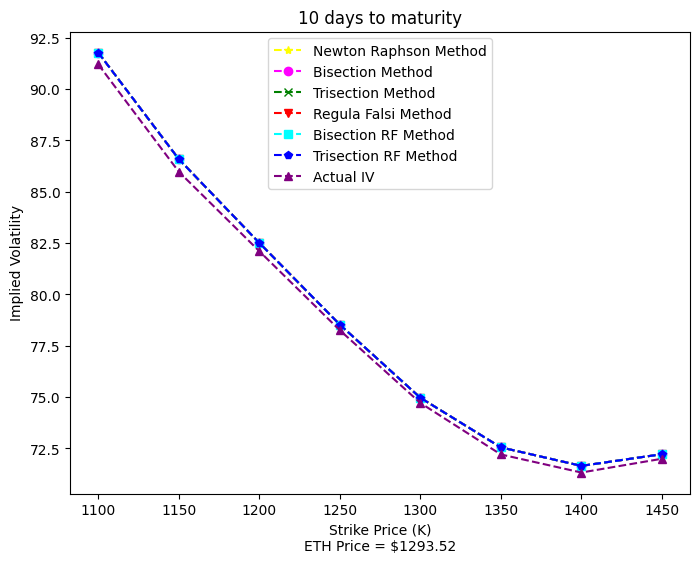

In [7]:
import math
import time
K = [1100,1150,1200,1250,1300,1350,1400,1450]
S = 1293.52
r = 0
tau = 9.589/365
Cm = [0.1592*S, 0.1258*S, 0.0954*S, 0.0685*S, 0.0461*S, 0.0292*S, 0.0178*S, 0.0108*S]
cNR, sigNR, t1 = ImpliedVolatilityNR('c',Cm,S,K,tau,r)
print('Newton-Raphson Method')
print(cNR)
print(sigNR)
print(t1)
cBM, sigBM, t1, l, u = ImpliedVolatilityBM('c',Cm,S,K,tau,r)
print('Bisection Method')
print(cBM)
print(sigBM)
print(t1)
print(l)
print(u)
cTrM, sigTrM, t1, l, u = ImpliedVolatilityTrM('c',Cm,S,K,tau,r)
print('Trisection Method')
print(cTrM)
print(sigTrM)
print(t1)
print(l)
print(u)
cRfM, sigRfM, t1, l, u = ImpliedVolatilityRfM('c',Cm,S,K,tau,r)
print('Regula-Falsi Method')
print(cRfM)
print(sigRfM)
print(t1)
print(l)
print(u)
cBRfM, sigBRfM, t1, l, u = ImpliedVolatilityBRfM('c',Cm,S,K,tau,r)
print('Bisection-Regula Falsi Method')
print(cBRfM)
print(sigBRfM)
print(t1)
print(l)
print(u)
cTRfM, sigTRfM, t1, l, u = ImpliedVolatilityTRfM('c',Cm,S,K,tau,r)
print('Trisection-Regula Falsi Method')
print(cTRfM)
print(sigTRfM)
print(t1)
print(l)
print(u)
IV = [91.2, 85.97, 82.1, 78.25, 74.71, 72.2, 71.32, 71.99]
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8,6)
plt.plot(K,np.array(sigNR)*100,'*--',color = "yellow")
plt.plot(K,np.array(sigBM)*100,'o--',color = "magenta")
plt.plot(K,np.array(sigTrM)*100, 'x--', color = "green")
plt.plot(K,np.array(sigRfM)*100, 'v--',color = "red")
plt.plot(K,np.array(sigBRfM)*100, 's--',color = "cyan")
plt.plot(K,np.array(sigTRfM)*100, 'p--',color = "blue")
plt.plot(K,IV, '^--', color = "purple")
plt.title('10 days to maturity')
plt.legend(['Newton Raphson Method','Bisection Method', 'Trisection Method', 'Regula Falsi Method', 'Bisection RF Method','Trisection RF Method','Actual IV'], loc = 'upper center')
plt.xlabel('Strike Price (K)\nETH Price = $1293.52')
plt.ylabel('Implied Volatility')
error = list(np.array(sigNR)*100 - np.array(IV))
error = [x/100 for x in error]
print('RMSE Newton Raphson Method = ',error)
error = list(np.array(sigBM)*100 - np.array(IV))
error = [x/100 for x in error]
print('RMSE Bisection Method = ',error)
error = list(np.array(sigTrM)*100 - np.array(IV))
error = [x/100 for x in error]
print('RMSE Trisection Method = ',error)
error = list(np.array(sigRfM)*100 - np.array(IV))
error = [x/100 for x in error]
print('RMSE Regula Falsi Method = ',error)
error = list(np.array(sigBRfM)*100 - np.array(IV))
error = [x/100 for x in error]
print('RMSE Bisection Regula Falsi Method = ',error)
error = list(np.array(sigTRfM)*100 - np.array(IV))
error = [x/100 for x in error]
print('RMSE Trisection Regula Falsi Method = ',error)

**Day 9**

Newton-Raphson Method
[6, 5, 5, 4, 2, 4, 5, 5]
[0.9310115906269608, 0.8757760234360469, 0.8317214976759137, 0.7921850439609981, 0.7551465657210245, 0.7280170034358779, 0.719041142648257, 0.7250299493881727]
[0.003862142562866211, 0.00350189208984375, 0.0028417110443115234, 0.002488374710083008, 0.0011451244354248047, 0.0022230148315429688, 0.004111528396606445, 0.003309011459350586]


<ipython-input-6-ce3f78530906>:6: RuntimeWarning: divide by zero encountered in scalar divide
  d1 = (np.log(S / float(K)) + (r + 0.5 * np.power(sigma,2.0)) * tau) / float(sigma * np.sqrt(tau))


Bisection Method
[25, 26, 26, 27, 27, 28, 26, 26]
[0.9310115873813629, 0.8757760375738144, 0.8317214995622635, 0.7921850308775902, 0.7551465556025505, 0.7280169986188412, 0.7190411537885666, 0.725029930472374]
[0.017889976501464844, 0.017079830169677734, 0.018321752548217773, 0.018543004989624023, 0.08860063552856445, 0.06298685073852539, 0.017882108688354492, 0.017716646194458008]
[0.9310115873813629, 0.8757759630680084, 0.8317214250564575, 0.7921850308775902, 0.7551465556025505, 0.7280169986188412, 0.7190410792827606, 0.725029930472374]
[0.9310117363929749, 0.8757760375738144, 0.8317214995622635, 0.7921850681304932, 0.7551465928554535, 0.7280170172452927, 0.7190411537885666, 0.7250300049781799]
Trisection Method
[17, 17, 17, 17, 17, 16, 17, 17]
[0.9310116017121645, 0.8757760356861249, 0.831721499375837, 0.7921850385150901, 0.7551465611825191, 0.7280170073813519, 0.7190411398195309, 0.7250299428536419]
[0.033536434173583984, 0.040128469467163086, 0.025411367416381836, 0.02863860130310

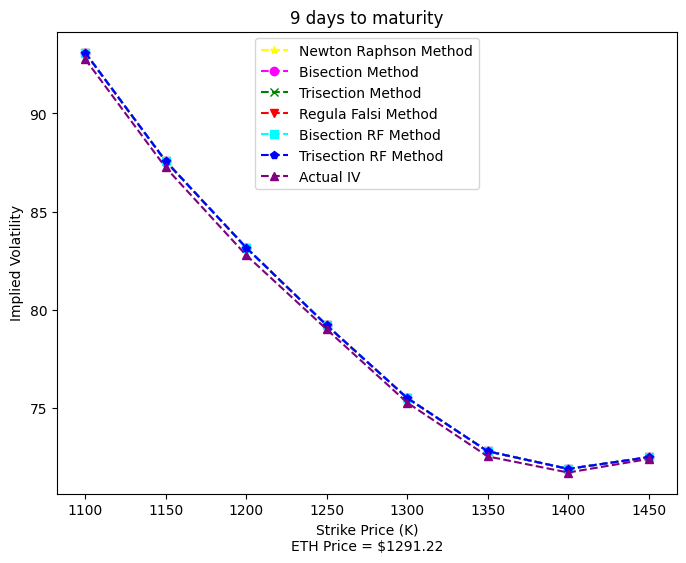

In [8]:
import math
import time
K = [1100,1150,1200,1250,1300,1350,1400,1450]
S = 1291.22
r = 0
tau = 8.692/365
Cm = [0.1569*S, 0.1232*S, 0.0925*S, 0.0656*S, 0.0433*S, 0.0266*S, 0.0157*S, 0.0092*S]
cNR, sigNR, t1 = ImpliedVolatilityNR('c',Cm,S,K,tau,r)
print('Newton-Raphson Method')
print(cNR)
print(sigNR)
print(t1)
cBM, sigBM, t1, l, u = ImpliedVolatilityBM('c',Cm,S,K,tau,r)
print('Bisection Method')
print(cBM)
print(sigBM)
print(t1)
print(l)
print(u)
cTrM, sigTrM, t1, l, u = ImpliedVolatilityTrM('c',Cm,S,K,tau,r)
print('Trisection Method')
print(cTrM)
print(sigTrM)
print(t1)
print(l)
print(u)
cRfM, sigRfM, t1, l, u = ImpliedVolatilityRfM('c',Cm,S,K,tau,r)
print('Regula-Falsi Method')
print(cRfM)
print(sigRfM)
print(t1)
print(l)
print(u)
cBRfM, sigBRfM, t1, l, u = ImpliedVolatilityBRfM('c',Cm,S,K,tau,r)
print('Bisection-Regula Falsi Method')
print(cBRfM)
print(sigBRfM)
print(t1)
print(l)
print(u)
cTRfM, sigTRfM, t1, l, u = ImpliedVolatilityTRfM('c',Cm,S,K,tau,r)
print('Trisection-Regula Falsi Method')
print(cTRfM)
print(sigTRfM)
print(t1)
print(l)
print(u)
IV = [92.77, 87.25, 82.79, 79.01, 75.28, 72.54, 71.72, 72.41]
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8,6)
plt.plot(K,np.array(sigNR)*100,'*--',color = "yellow")
plt.plot(K,np.array(sigBM)*100,'o--',color = "magenta")
plt.plot(K,np.array(sigTrM)*100, 'x--', color = "green")
plt.plot(K,np.array(sigRfM)*100, 'v--',color = "red")
plt.plot(K,np.array(sigBRfM)*100, 's--',color = "cyan")
plt.plot(K,np.array(sigTRfM)*100, 'p--',color = "blue")
plt.plot(K,IV, '^--', color = "purple")
plt.title('9 days to maturity')
plt.legend(['Newton Raphson Method','Bisection Method', 'Trisection Method', 'Regula Falsi Method', 'Bisection RF Method','Trisection RF Method','Actual IV'], loc = 'upper center')
plt.xlabel('Strike Price (K)\nETH Price = $1291.22')
plt.ylabel('Implied Volatility')
error = list(np.array(sigNR)*100 - np.array(IV))
error = [x/100 for x in error]
print('RMSE Newton Raphson Method = ',error)
error = list(np.array(sigBM)*100 - np.array(IV))
error = [x/100 for x in error]
print('RMSE Bisection Method = ',error)
error = list(np.array(sigTrM)*100 - np.array(IV))
error = [x/100 for x in error]
print('RMSE Trisection Method = ',error)
error = list(np.array(sigRfM)*100 - np.array(IV))
error = [x/100 for x in error]
print('RMSE Regula Falsi Method = ',error)
error = list(np.array(sigBRfM)*100 - np.array(IV))
error = [x/100 for x in error]
print('RMSE Bisection Regula Falsi Method = ',error)
error = list(np.array(sigTRfM)*100 - np.array(IV))
error = [x/100 for x in error]
print('RMSE Trisection Regula Falsi Method = ',error)

**Day 8**

Newton-Raphson Method
[5, 4, 3, 4, 5, 5, 6, 6]
[0.8587053935234888, 0.8124508900131948, 0.768425243133077, 0.7387559298929469, 0.7289635945647492, 0.7361723728365651, 0.759243745593211, 0.792156278973979]
[0.00614166259765625, 0.002034425735473633, 0.001809835433959961, 0.002287626266479492, 0.0025920867919921875, 0.0029180049896240234, 0.008632898330688477, 0.008428335189819336]


<ipython-input-6-ce3f78530906>:6: RuntimeWarning: divide by zero encountered in scalar divide
  d1 = (np.log(S / float(K)) + (r + 0.5 * np.power(sigma,2.0)) * tau) / float(sigma * np.sqrt(tau))


Bisection Method
[27, 28, 26, 28, 28, 27, 26, 25]
[0.8587053790688515, 0.8124508894979954, 0.768425241112709, 0.7387559302151203, 0.7289635948836803, 0.7361723855137825, 0.7592437416315079, 0.792156308889389]
[0.03636932373046875, 0.018813610076904297, 0.017874956130981445, 0.037995338439941406, 0.0465846061706543, 0.0338444709777832, 0.029207468032836914, 0.01748514175415039]
[0.8587053790688515, 0.8124508894979954, 0.768425241112709, 0.7387559115886688, 0.7289635762572289, 0.7361723482608795, 0.7592437416315079, 0.7921561598777771]
[0.8587054163217545, 0.8124509081244469, 0.768425315618515, 0.7387559302151203, 0.7289635948836803, 0.7361723855137825, 0.7592438161373138, 0.792156308889389]
Trisection Method
[17, 17, 17, 15, 18, 17, 17, 16]
[0.8587053974835076, 0.812450887180621, 0.7684252342162523, 0.7387559205729052, 0.7289635887068432, 0.7361723711003835, 0.7592437373646495, 0.7921562713220367]
[0.029623031616210938, 0.03282737731933594, 0.02853846549987793, 0.0403132438659668, 0.024

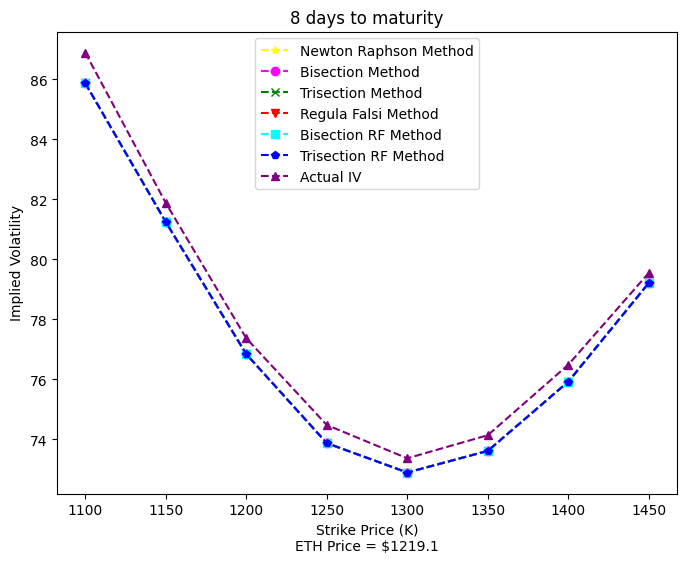

In [9]:
import math
import time
K = [1100,1150,1200,1250,1300,1350,1400,1450]
S = 1219.1
r = 0
tau = 7.69/365
Cm = [0.1113*S, 0.0795*S, 0.0524*S, 0.0318*S, 0.0182*S, 0.0102*S, 0.0059*S, 0.0036*S]
cNR, sigNR, t1 = ImpliedVolatilityNR('c',Cm,S,K,tau,r)
print('Newton-Raphson Method')
print(cNR)
print(sigNR)
print(t1)
cBM, sigBM, t1, l, u = ImpliedVolatilityBM('c',Cm,S,K,tau,r)
print('Bisection Method')
print(cBM)
print(sigBM)
print(t1)
print(l)
print(u)
cTrM, sigTrM, t1, l, u = ImpliedVolatilityTrM('c',Cm,S,K,tau,r)
print('Trisection Method')
print(cTrM)
print(sigTrM)
print(t1)
print(l)
print(u)
cRfM, sigRfM, t1, l, u = ImpliedVolatilityRfM('c',Cm,S,K,tau,r)
print('Regula-Falsi Method')
print(cRfM)
print(sigRfM)
print(t1)
print(l)
print(u)
cBRfM, sigBRfM, t1, l, u = ImpliedVolatilityBRfM('c',Cm,S,K,tau,r)
print('Bisection-Regula Falsi Method')
print(cBRfM)
print(sigBRfM)
print(t1)
print(l)
print(u)
cTRfM, sigTRfM, t1, l, u = ImpliedVolatilityTRfM('c',Cm,S,K,tau,r)
print('Trisection-Regula Falsi Method')
print(cTRfM)
print(sigTRfM)
print(t1)
print(l)
print(u)
IV = [86.89, 81.88, 77.37, 74.48, 73.37, 74.14, 76.49, 79.55]
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8,6)
plt.plot(K,np.array(sigNR)*100,'*--',color = "yellow")
plt.plot(K,np.array(sigBM)*100,'o--',color = "magenta")
plt.plot(K,np.array(sigTrM)*100, 'x--', color = "green")
plt.plot(K,np.array(sigRfM)*100, 'v--',color = "red")
plt.plot(K,np.array(sigBRfM)*100, 's--',color = "cyan")
plt.plot(K,np.array(sigTRfM)*100, 'p--',color = "blue")
plt.plot(K,IV, '^--', color = "purple")
plt.title('8 days to maturity')
plt.legend(['Newton Raphson Method','Bisection Method', 'Trisection Method', 'Regula Falsi Method', 'Bisection RF Method','Trisection RF Method','Actual IV'], loc = 'upper center')
plt.xlabel('Strike Price (K)\nETH Price = $1219.1')
plt.ylabel('Implied Volatility')
error = list(np.array(sigNR)*100 - np.array(IV))
error = [x/100 for x in error]
print('RMSE Newton Raphson Method = ',error)
error = list(np.array(sigBM)*100 - np.array(IV))
error = [x/100 for x in error]
print('RMSE Bisection Method = ',error)
error = list(np.array(sigTrM)*100 - np.array(IV))
error = [x/100 for x in error]
print('RMSE Trisection Method = ',error)
error = list(np.array(sigRfM)*100 - np.array(IV))
error = [x/100 for x in error]
print('RMSE Regula Falsi Method = ',error)
error = list(np.array(sigBRfM)*100 - np.array(IV))
error = [x/100 for x in error]
print('RMSE Bisection Regula Falsi Method = ',error)
error = list(np.array(sigTRfM)*100 - np.array(IV))
error = [x/100 for x in error]
print('RMSE Trisection Regula Falsi Method = ',error)

**Day 7**

Newton-Raphson Method
[6, 6, 5, 4, 3, 4, 5, 6]
[0.8684617000819366, 0.782471514644715, 0.7145646657754352, 0.6679965056845122, 0.6463178925110499, 0.6379296821280115, 0.6427400102411681, 0.6497730023544223]
[0.003108501434326172, 0.016251087188720703, 0.002275705337524414, 0.01285409927368164, 0.0017313957214355469, 0.01226663589477539, 0.012660741806030273, 0.002784252166748047]


<ipython-input-6-ce3f78530906>:6: RuntimeWarning: divide by zero encountered in scalar divide
  d1 = (np.log(S / float(K)) + (r + 0.5 * np.power(sigma,2.0)) * tau) / float(sigma * np.sqrt(tau))


Bisection Method
[23, 26, 27, 27, 24, 28, 27, 25]
[0.8684617280960083, 0.7824715226888657, 0.7145646587014198, 0.6679965183138847, 0.6463178992271423, 0.6379296816885471, 0.6427400186657906, 0.6497730314731598]
[0.04385972023010254, 0.0927896499633789, 0.045053958892822266, 0.05336308479309082, 0.03292083740234375, 0.08855581283569336, 0.04555010795593262, 0.03424406051635742]
[0.8684611320495605, 0.7824714481830597, 0.7145646587014198, 0.6679964810609818, 0.6463176012039185, 0.6379296816885471, 0.6427399814128876, 0.6497728824615479]
[0.8684617280960083, 0.7824715226888657, 0.7145646959543228, 0.6679965183138847, 0.6463178992271423, 0.6379297003149986, 0.6427400186657906, 0.6497730314731598]
Trisection Method
[16, 17, 16, 18, 18, 17, 16, 17]
[0.8684617348670992, 0.7824715228212932, 0.7145646470958846, 0.6679965111499305, 0.6463178951797772, 0.6379296965886593, 0.6427400126481176, 0.6497729912265946]
[0.05191516876220703, 0.08692479133605957, 0.09690999984741211, 0.11411905288696289, 0

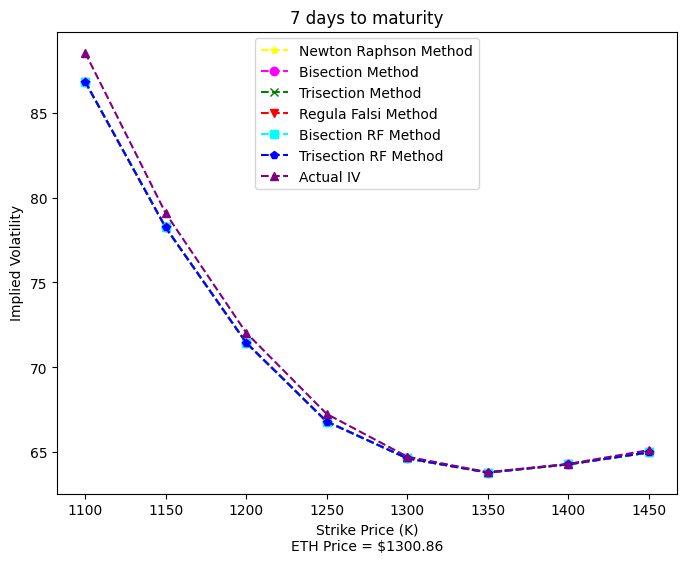

In [10]:
import math
import time
K = [1100,1150,1200,1250,1300,1350,1400,1450]
S = 1300.86
r = 0
tau = 6.569/365
Cm = [0.158*S, 0.1218*S, 0.0878*S, 0.058*S, 0.0349*S, 0.0191*S, 0.0098*S, 0.0047*S]
cNR, sigNR, t1 = ImpliedVolatilityNR('c',Cm,S,K,tau,r)
print('Newton-Raphson Method')
print(cNR)
print(sigNR)
print(t1)
cBM, sigBM, t1, l, u = ImpliedVolatilityBM('c',Cm,S,K,tau,r)
print('Bisection Method')
print(cBM)
print(sigBM)
print(t1)
print(l)
print(u)
cTrM, sigTrM, t1, l, u = ImpliedVolatilityTrM('c',Cm,S,K,tau,r)
print('Trisection Method')
print(cTrM)
print(sigTrM)
print(t1)
print(l)
print(u)
cRfM, sigRfM, t1, l, u = ImpliedVolatilityRfM('c',Cm,S,K,tau,r)
print('Regula-Falsi Method')
print(cRfM)
print(sigRfM)
print(t1)
print(l)
print(u)
cBRfM, sigBRfM, t1, l, u = ImpliedVolatilityBRfM('c',Cm,S,K,tau,r)
print('Bisection-Regula Falsi Method')
print(cBRfM)
print(sigBRfM)
print(t1)
print(l)
print(u)
cTRfM, sigTRfM, t1, l, u = ImpliedVolatilityTRfM('c',Cm,S,K,tau,r)
print('Trisection-Regula Falsi Method')
print(cTRfM)
print(sigTRfM)
print(t1)
print(l)
print(u)
IV = [88.56, 79.09, 72.04, 67.25, 64.73, 63.81, 64.3, 65.11]
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8,6)
plt.plot(K,np.array(sigNR)*100,'*--',color = "yellow")
plt.plot(K,np.array(sigBM)*100,'o--',color = "magenta")
plt.plot(K,np.array(sigTrM)*100, 'x--', color = "green")
plt.plot(K,np.array(sigRfM)*100, 'v--',color = "red")
plt.plot(K,np.array(sigBRfM)*100, 's--',color = "cyan")
plt.plot(K,np.array(sigTRfM)*100, 'p--',color = "blue")
plt.plot(K,IV, '^--', color = "purple")
plt.title('7 days to maturity')
plt.legend(['Newton Raphson Method','Bisection Method', 'Trisection Method', 'Regula Falsi Method', 'Bisection RF Method','Trisection RF Method','Actual IV'], loc = 'upper center')
plt.xlabel('Strike Price (K)\nETH Price = $1300.86')
plt.ylabel('Implied Volatility')
error = list(np.array(sigNR)*100 - np.array(IV))
error = [x/100 for x in error]
print('RMSE Newton Raphson Method = ',error)
error = list(np.array(sigBM)*100 - np.array(IV))
error = [x/100 for x in error]
print('RMSE Bisection Method = ',error)
error = list(np.array(sigTrM)*100 - np.array(IV))
error = [x/100 for x in error]
print('RMSE Trisection Method = ',error)
error = list(np.array(sigRfM)*100 - np.array(IV))
error = [x/100 for x in error]
print('RMSE Regula Falsi Method = ',error)
error = list(np.array(sigBRfM)*100 - np.array(IV))
error = [x/100 for x in error]
print('RMSE Bisection Regula Falsi Method = ',error)
error = list(np.array(sigTRfM)*100 - np.array(IV))
error = [x/100 for x in error]
print('RMSE Trisection Regula Falsi Method = ',error)

**Day 6**

Newton-Raphson Method
[6, 6, 5, 4, 4, 5, 6, 7]
[0.8481936076693816, 0.753923962645469, 0.6668141440591129, 0.621323077872679, 0.5999878083187788, 0.5980926803867044, 0.6148800761378227, 0.6338342481088349]
[0.006694316864013672, 0.003294229507446289, 0.0028650760650634766, 0.0022416114807128906, 0.0021173954010009766, 0.03399658203125, 0.003592967987060547, 0.011189460754394531]


<ipython-input-6-ce3f78530906>:6: RuntimeWarning: divide by zero encountered in scalar divide
  d1 = (np.log(S / float(K)) + (r + 0.5 * np.power(sigma,2.0)) * tau) / float(sigma * np.sqrt(tau))


Bisection Method
[25, 24, 24, 26, 24, 23, 26, 26]
[0.8481936156749725, 0.7539239525794983, 0.6668141484260559, 0.6213230639696121, 0.599987804889679, 0.5980926752090454, 0.6148800998926163, 0.6338342279195786]
[0.05635547637939453, 0.01939868927001953, 0.027280330657958984, 0.02630162239074707, 0.016030550003051758, 0.015088081359863281, 0.02803945541381836, 0.03135991096496582]
[0.8481934666633606, 0.7539239525794983, 0.666813850402832, 0.6213230639696121, 0.599987804889679, 0.5980926752090454, 0.6148800253868103, 0.6338342279195786]
[0.8481936156749725, 0.7539242506027222, 0.6668141484260559, 0.6213231384754181, 0.5999881029129028, 0.5980932712554932, 0.6148800998926163, 0.6338343024253845]
Trisection Method
[16, 14, 17, 17, 17, 17, 16, 16]
[0.8481936405794995, 0.7539239748365505, 0.6668141266013424, 0.6213230890842224, 0.5999878209848628, 0.5980926708292912, 0.6148800509102657, 0.6338342239818918]
[0.022597074508666992, 0.020408153533935547, 0.026057720184326172, 0.02434587478637695

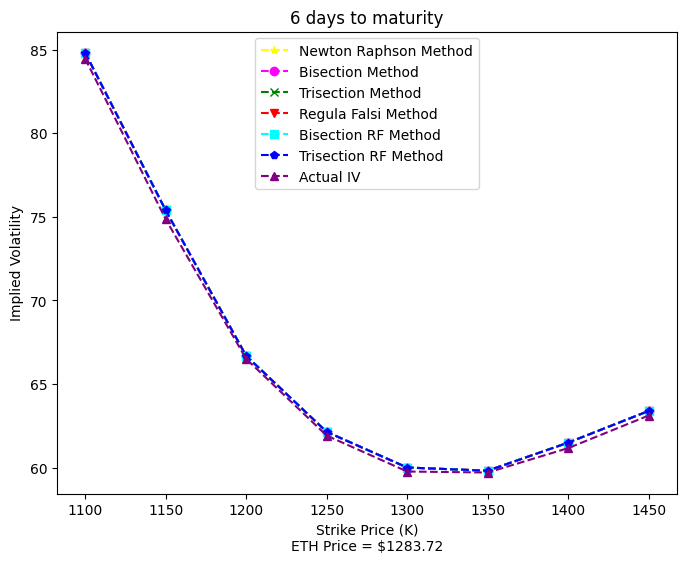

In [11]:
import math
import time
K = [1100,1150,1200,1250,1300,1350,1400,1450]
S = 1283.72
r = 0
tau = 5.632/365
Cm = [0.1462*S, 0.1094*S, 0.0746*S, 0.0453*S, 0.024*S, 0.0113*S, 0.0051*S, 0.0022*S]
cNR, sigNR, t1 = ImpliedVolatilityNR('c',Cm,S,K,tau,r)
print('Newton-Raphson Method')
print(cNR)
print(sigNR)
print(t1)
cBM, sigBM, t1, l, u = ImpliedVolatilityBM('c',Cm,S,K,tau,r)
print('Bisection Method')
print(cBM)
print(sigBM)
print(t1)
print(l)
print(u)
cTrM, sigTrM, t1, l, u = ImpliedVolatilityTrM('c',Cm,S,K,tau,r)
print('Trisection Method')
print(cTrM)
print(sigTrM)
print(t1)
print(l)
print(u)
cRfM, sigRfM, t1, l, u = ImpliedVolatilityRfM('c',Cm,S,K,tau,r)
print('Regula-Falsi Method')
print(cRfM)
print(sigRfM)
print(t1)
print(l)
print(u)
cBRfM, sigBRfM, t1, l, u = ImpliedVolatilityBRfM('c',Cm,S,K,tau,r)
print('Bisection-Regula Falsi Method')
print(cBRfM)
print(sigBRfM)
print(t1)
print(l)
print(u)
cTRfM, sigTRfM, t1, l, u = ImpliedVolatilityTRfM('c',Cm,S,K,tau,r)
print('Trisection-Regula Falsi Method')
print(cTRfM)
print(sigTRfM)
print(t1)
print(l)
print(u)
IV = [84.46, 74.86, 66.5, 61.91, 59.76, 59.7, 61.16, 63.11]
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8,6)
plt.plot(K,np.array(sigNR)*100,'*--',color = "yellow")
plt.plot(K,np.array(sigBM)*100,'o--',color = "magenta")
plt.plot(K,np.array(sigTrM)*100, 'x--', color = "green")
plt.plot(K,np.array(sigRfM)*100, 'v--',color = "red")
plt.plot(K,np.array(sigBRfM)*100, 's--',color = "cyan")
plt.plot(K,np.array(sigTRfM)*100, 'p--',color = "blue")
plt.plot(K,IV, '^--', color = "purple")
plt.title('6 days to maturity')
plt.legend(['Newton Raphson Method','Bisection Method', 'Trisection Method', 'Regula Falsi Method', 'Bisection RF Method','Trisection RF Method','Actual IV'], loc = 'upper center')
plt.xlabel('Strike Price (K)\nETH Price = $1283.72')
plt.ylabel('Implied Volatility')
error = list(np.array(sigNR)*100 - np.array(IV))
error = [x/100 for x in error]
print('RMSE Newton Raphson Method = ',error)
error = list(np.array(sigBM)*100 - np.array(IV))
error = [x/100 for x in error]
print('RMSE Bisection Method = ',error)
error = list(np.array(sigTrM)*100 - np.array(IV))
error = [x/100 for x in error]
print('RMSE Trisection Method = ',error)
error = list(np.array(sigRfM)*100 - np.array(IV))
error = [x/100 for x in error]
print('RMSE Regula Falsi Method = ',error)
error = list(np.array(sigBRfM)*100 - np.array(IV))
error = [x/100 for x in error]
print('RMSE Bisection Regula Falsi Method = ',error)
error = list(np.array(sigTRfM)*100 - np.array(IV))
error = [x/100 for x in error]
print('RMSE Trisection Regula Falsi Method = ',error)

**Day 5**

Newton-Raphson Method
[6, 6, 5, 4, 4, 5, 6, 7]
[0.913880644423069, 0.7932521059795601, 0.6958622459074792, 0.6420599139548919, 0.6155570428380923, 0.6229674923645122, 0.6468236925117801, 0.7053003215997427]
[0.003871440887451172, 0.0032634735107421875, 0.0026721954345703125, 0.0023572444915771484, 0.0020830631256103516, 0.002675294876098633, 0.003550291061401367, 0.004405021667480469]


<ipython-input-6-ce3f78530906>:6: RuntimeWarning: divide by zero encountered in scalar divide
  d1 = (np.log(S / float(K)) + (r + 0.5 * np.power(sigma,2.0)) * tau) / float(sigma * np.sqrt(tau))


Bisection Method
[25, 25, 26, 27, 26, 22, 26, 24]
[0.9138806164264679, 0.7932521402835846, 0.6958622485399246, 0.6420599296689034, 0.6155570596456528, 0.6229674816131592, 0.6468237191438675, 0.7053002715110779]
[0.04900026321411133, 0.044751644134521484, 0.01751708984375, 0.0182802677154541, 0.028522491455078125, 0.025280475616455078, 0.029949426651000977, 0.028551340103149414]
[0.9138806164264679, 0.7932519912719727, 0.6958621740341187, 0.6420598924160004, 0.6155569851398468, 0.6229674816131592, 0.6468236446380615, 0.7053002715110779]
[0.9138807654380798, 0.7932521402835846, 0.6958622485399246, 0.6420599296689034, 0.6155570596456528, 0.6229686737060547, 0.6468237191438675, 0.7053005695343018]
Trisection Method
[16, 17, 17, 17, 17, 17, 16, 16]
[0.9138806414546647, 0.7932520961739845, 0.695862254719316, 0.6420598989022493, 0.6155570285287623, 0.6229675039205271, 0.6468237150978351, 0.7053002945334675]
[0.058916568756103516, 0.07206153869628906, 0.0754539966583252, 0.08118152618408203, 0

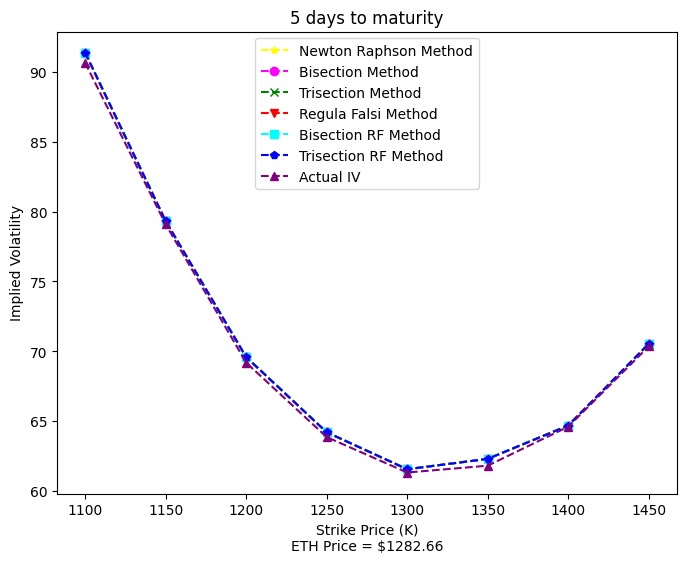

In [12]:
import math
import time
K = [1100,1150,1200,1250,1300,1350,1400,1450]
S = 1282.66
r = 0
tau = 4.596/365
Cm = [0.1452*S, 0.1079*S, 0.0727*S, 0.0429*S, 0.0215*S, 0.0097*S, 0.0042*S, 0.0022*S]
cNR, sigNR, t1 = ImpliedVolatilityNR('c',Cm,S,K,tau,r)
print('Newton-Raphson Method')
print(cNR)
print(sigNR)
print(t1)
cBM, sigBM, t1, l, u = ImpliedVolatilityBM('c',Cm,S,K,tau,r)
print('Bisection Method')
print(cBM)
print(sigBM)
print(t1)
print(l)
print(u)
cTrM, sigTrM, t1, l, u = ImpliedVolatilityTrM('c',Cm,S,K,tau,r)
print('Trisection Method')
print(cTrM)
print(sigTrM)
print(t1)
print(l)
print(u)
cRfM, sigRfM, t1, l, u = ImpliedVolatilityRfM('c',Cm,S,K,tau,r)
print('Regula-Falsi Method')
print(cRfM)
print(sigRfM)
print(t1)
print(l)
print(u)
cBRfM, sigBRfM, t1, l, u = ImpliedVolatilityBRfM('c',Cm,S,K,tau,r)
print('Bisection-Regula Falsi Method')
print(cBRfM)
print(sigBRfM)
print(t1)
print(l)
print(u)
cTRfM, sigTRfM, t1, l, u = ImpliedVolatilityTRfM('c',Cm,S,K,tau,r)
print('Trisection-Regula Falsi Method')
print(cTRfM)
print(sigTRfM)
print(t1)
print(l)
print(u)
IV = [90.66, 79.1, 69.19, 63.86, 61.32, 61.81, 64.6, 70.351]
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8,6)
plt.plot(K,np.array(sigNR)*100,'*--',color = "yellow")
plt.plot(K,np.array(sigBM)*100,'o--',color = "magenta")
plt.plot(K,np.array(sigTrM)*100, 'x--', color = "green")
plt.plot(K,np.array(sigRfM)*100, 'v--',color = "red")
plt.plot(K,np.array(sigBRfM)*100, 's--',color = "cyan")
plt.plot(K,np.array(sigTRfM)*100, 'p--',color = "blue")
plt.plot(K,IV, '^--', color = "purple")
plt.title('5 days to maturity')
plt.legend(['Newton Raphson Method','Bisection Method', 'Trisection Method', 'Regula Falsi Method', 'Bisection RF Method','Trisection RF Method','Actual IV'], loc = 'upper center')
plt.xlabel('Strike Price (K)\nETH Price = $1282.66')
plt.ylabel('Implied Volatility')
error = list(np.array(sigNR)*100 - np.array(IV))
error = [x/100 for x in error]
print('RMSE Newton Raphson Method = ',error)
error = list(np.array(sigBM)*100 - np.array(IV))
error = [x/100 for x in error]
print('RMSE Bisection Method = ',error)
error = list(np.array(sigTrM)*100 - np.array(IV))
error = [x/100 for x in error]
print('RMSE Trisection Method = ',error)
error = list(np.array(sigRfM)*100 - np.array(IV))
error = [x/100 for x in error]
print('RMSE Regula Falsi Method = ',error)
error = list(np.array(sigBRfM)*100 - np.array(IV))
error = [x/100 for x in error]
print('RMSE Bisection Regula Falsi Method = ',error)
error = list(np.array(sigTRfM)*100 - np.array(IV))
error = [x/100 for x in error]
print('RMSE Trisection Regula Falsi Method = ',error)

**Day 4**

Newton-Raphson Method
[7, 7, 6, 5, 4, 4, 5, 6]
[0.9961889072582603, 0.914884699485777, 0.7707426161020667, 0.6601020148355428, 0.6086467344322009, 0.5992879217913542, 0.621642288061285, 0.6641970455773917]
[0.012449502944946289, 0.014530181884765625, 0.010735511779785156, 0.0027501583099365234, 0.012665510177612305, 0.0023539066314697266, 0.002702951431274414, 0.0032072067260742188]


<ipython-input-6-ce3f78530906>:6: RuntimeWarning: divide by zero encountered in scalar divide
  d1 = (np.log(S / float(K)) + (r + 0.5 * np.power(sigma,2.0)) * tau) / float(sigma * np.sqrt(tau))


Bisection Method
[24, 25, 24, 26, 25, 27, 27, 25]
[0.9961888194084167, 0.9148846566677094, 0.7707425951957703, 0.6601019948720932, 0.6086467206478119, 0.5992879346013069, 0.6216422840952873, 0.6641970574855804]
[0.026730060577392578, 0.02779102325439453, 0.04963207244873047, 0.033760786056518555, 0.020624876022338867, 0.018524169921875, 0.01579141616821289, 0.03769087791442871]
[0.9961888194084167, 0.9148846566677094, 0.7707425951957703, 0.6601019948720932, 0.6086467206478119, 0.5992878973484039, 0.6216422840952873, 0.6641969084739685]
[0.9961891174316406, 0.9148848056793213, 0.7707428932189941, 0.6601020693778992, 0.6086468696594238, 0.5992879346013069, 0.6216423213481903, 0.6641970574855804]
Trisection Method
[16, 14, 17, 17, 17, 16, 17, 16]
[0.9961888850953362, 0.9148846668251457, 0.7707426000383785, 0.6601020009553497, 0.6086467460940095, 0.5992879225342157, 0.6216422771589656, 0.6641970476682764]
[0.03102731704711914, 0.020969390869140625, 0.02638983726501465, 0.029183149337768555

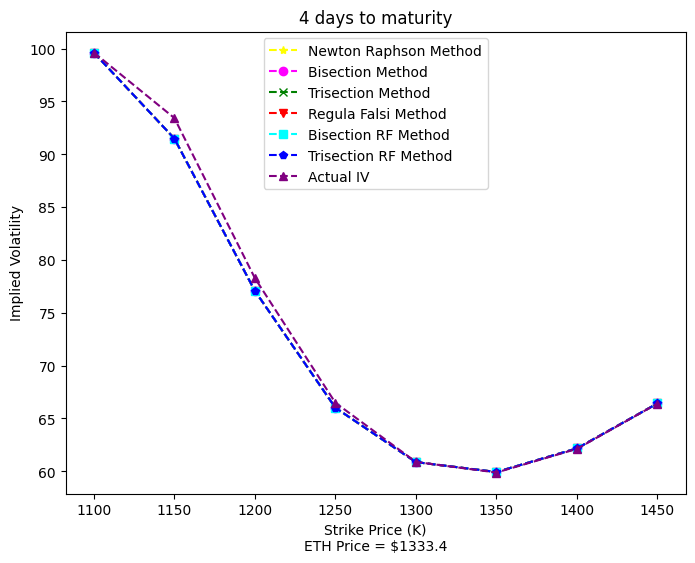

In [13]:
import math
import time
K = [1100,1150,1200,1250,1300,1350,1400,1450]
S = 1333.4
r = 0
tau = 3.7/365
Cm = [0.176*S, 0.1395*S, 0.103*S, 0.0682*S, 0.0387*S, 0.0185*S, 0.008*S, 0.0035*S]
cNR, sigNR, t1 = ImpliedVolatilityNR('c',Cm,S,K,tau,r)
print('Newton-Raphson Method')
print(cNR)
print(sigNR)
print(t1)
cBM, sigBM, t1, l, u = ImpliedVolatilityBM('c',Cm,S,K,tau,r)
print('Bisection Method')
print(cBM)
print(sigBM)
print(t1)
print(l)
print(u)
cTrM, sigTrM, t1, l, u = ImpliedVolatilityTrM('c',Cm,S,K,tau,r)
print('Trisection Method')
print(cTrM)
print(sigTrM)
print(t1)
print(l)
print(u)
cRfM, sigRfM, t1, l, u = ImpliedVolatilityRfM('c',Cm,S,K,tau,r)
print('Regula-Falsi Method')
print(cRfM)
print(sigRfM)
print(t1)
print(l)
print(u)
cBRfM, sigBRfM, t1, l, u = ImpliedVolatilityBRfM('c',Cm,S,K,tau,r)
print('Bisection-Regula Falsi Method')
print(cBRfM)
print(sigBRfM)
print(t1)
print(l)
print(u)
cTRfM, sigTRfM, t1, l, u = ImpliedVolatilityTRfM('c',Cm,S,K,tau,r)
print('Trisection-Regula Falsi Method')
print(cTRfM)
print(sigTRfM)
print(t1)
print(l)
print(u)
IV = [99.63, 93.43, 78.28, 66.48, 60.88, 59.88, 62.12, 66.41]
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8,6)
plt.plot(K,np.array(sigNR)*100,'*--',color = "yellow")
plt.plot(K,np.array(sigBM)*100,'o--',color = "magenta")
plt.plot(K,np.array(sigTrM)*100, 'x--', color = "green")
plt.plot(K,np.array(sigRfM)*100, 'v--',color = "red")
plt.plot(K,np.array(sigBRfM)*100, 's--',color = "cyan")
plt.plot(K,np.array(sigTRfM)*100, 'p--',color = "blue")
plt.plot(K,IV, '^--', color = "purple")
plt.title('4 days to maturity')
plt.legend(['Newton Raphson Method','Bisection Method', 'Trisection Method', 'Regula Falsi Method', 'Bisection RF Method','Trisection RF Method','Actual IV'], loc = 'upper center')
plt.xlabel('Strike Price (K)\nETH Price = $1333.4')
plt.ylabel('Implied Volatility')
error = list(np.array(sigNR)*100 - np.array(IV))
error = [x/100 for x in error]
print('RMSE Newton Raphson Method = ',error)
error = list(np.array(sigBM)*100 - np.array(IV))
error = [x/100 for x in error]
print('RMSE Bisection Method = ',error)
error = list(np.array(sigTrM)*100 - np.array(IV))
error = [x/100 for x in error]
print('RMSE Trisection Method = ',error)
error = list(np.array(sigRfM)*100 - np.array(IV))
error = [x/100 for x in error]
print('RMSE Regula Falsi Method = ',error)
error = list(np.array(sigBRfM)*100 - np.array(IV))
error = [x/100 for x in error]
print('RMSE Bisection Regula Falsi Method = ',error)
error = list(np.array(sigTRfM)*100 - np.array(IV))
error = [x/100 for x in error]
print('RMSE Trisection Regula Falsi Method = ',error)

**Day 3**

Newton-Raphson Method
[8, 7, 7, 6, 4, 4, 6, 7]
[0.9998102776144475, 0.85021894657408, 0.7038823223073537, 0.6351370948601974, 0.6025584229354813, 0.603408454462258, 0.6309893779708244, 0.6902257693998322]
[0.012336254119873047, 0.004159450531005859, 0.011246681213378906, 0.0033576488494873047, 0.010406970977783203, 0.0021820068359375, 0.010539054870605469, 0.015674591064453125]


<ipython-input-6-ce3f78530906>:6: RuntimeWarning: divide by zero encountered in scalar divide
  d1 = (np.log(S / float(K)) + (r + 0.5 * np.power(sigma,2.0)) * tau) / float(sigma * np.sqrt(tau))


Bisection Method
[23, 24, 24, 25, 25, 26, 24, 25]
[0.9998100996017456, 0.8502188324928284, 0.7038822770118713, 0.6351371109485626, 0.6025584042072296, 0.6034084409475327, 0.6309893727302551, 0.6902258098125458]
[0.0518183708190918, 0.037598371505737305, 0.043593645095825195, 0.04762744903564453, 0.03960847854614258, 0.03265094757080078, 0.05883646011352539, 0.10633563995361328]
[0.9998100996017456, 0.8502188324928284, 0.7038822770118713, 0.6351369619369507, 0.6025584042072296, 0.6034084409475327, 0.6309893727302551, 0.6902256608009338]
[0.9998106956481934, 0.8502191305160522, 0.7038825750350952, 0.6351371109485626, 0.6025585532188416, 0.6034085154533386, 0.630989670753479, 0.6902258098125458]
Trisection Method
[15, 16, 16, 16, 15, 16, 16, 15]
[0.9998102991398577, 0.8502189980974392, 0.7038823003498919, 0.6351371106756307, 0.6025584387716779, 0.603408445442337, 0.6309894079969528, 0.690225743326652]
[0.03840017318725586, 0.08761477470397949, 0.022413015365600586, 0.02237415313720703, 0.

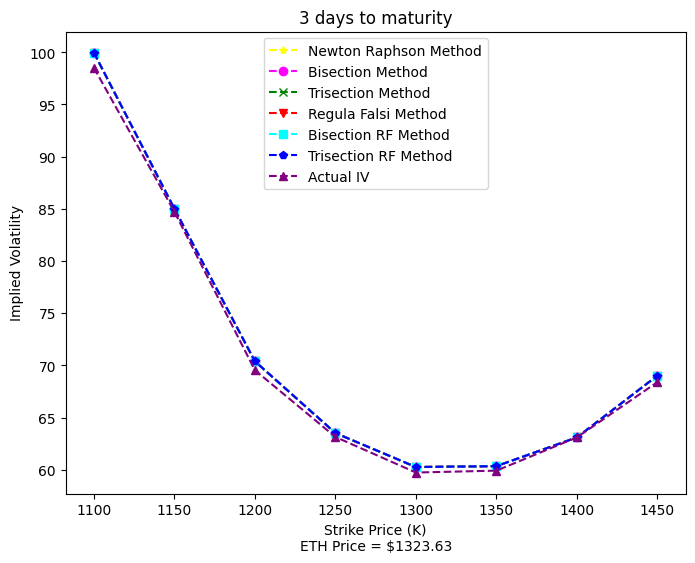

In [14]:
import math
import time
K = [1100,1150,1200,1250,1300,1350,1400,1450]
S = 1323.63
r = 0
tau = 2.717/365
Cm = [0.1694*S, 0.1319*S, 0.0947*S, 0.0597*S, 0.0307*S, 0.0125*S, 0.0044*S, 0.0017*S]
cNR, sigNR, t1 = ImpliedVolatilityNR('c',Cm,S,K,tau,r)
print('Newton-Raphson Method')
print(cNR)
print(sigNR)
print(t1)
cBM, sigBM, t1, l, u = ImpliedVolatilityBM('c',Cm,S,K,tau,r)
print('Bisection Method')
print(cBM)
print(sigBM)
print(t1)
print(l)
print(u)
cTrM, sigTrM, t1, l, u = ImpliedVolatilityTrM('c',Cm,S,K,tau,r)
print('Trisection Method')
print(cTrM)
print(sigTrM)
print(t1)
print(l)
print(u)
cRfM, sigRfM, t1, l, u = ImpliedVolatilityRfM('c',Cm,S,K,tau,r)
print('Regula-Falsi Method')
print(cRfM)
print(sigRfM)
print(t1)
print(l)
print(u)
cBRfM, sigBRfM, t1, l, u = ImpliedVolatilityBRfM('c',Cm,S,K,tau,r)
print('Bisection-Regula Falsi Method')
print(cBRfM)
print(sigBRfM)
print(t1)
print(l)
print(u)
cTRfM, sigTRfM, t1, l, u = ImpliedVolatilityTRfM('c',Cm,S,K,tau,r)
print('Trisection-Regula Falsi Method')
print(cTRfM)
print(sigTRfM)
print(t1)
print(l)
print(u)
IV = [98.53, 84.73, 69.54, 63.14, 59.73, 59.91, 63.1, 68.4]
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8,6)
plt.plot(K,np.array(sigNR)*100,'*--',color = "yellow")
plt.plot(K,np.array(sigBM)*100,'o--',color = "magenta")
plt.plot(K,np.array(sigTrM)*100, 'x--', color = "green")
plt.plot(K,np.array(sigRfM)*100, 'v--',color = "red")
plt.plot(K,np.array(sigBRfM)*100, 's--',color = "cyan")
plt.plot(K,np.array(sigTRfM)*100, 'p--',color = "blue")
plt.plot(K,IV, '^--', color = "purple")
plt.title('3 days to maturity')
plt.legend(['Newton Raphson Method','Bisection Method', 'Trisection Method', 'Regula Falsi Method', 'Bisection RF Method','Trisection RF Method','Actual IV'], loc = 'upper center')
plt.xlabel('Strike Price (K)\nETH Price = $1323.63')
plt.ylabel('Implied Volatility')
error = list(np.array(sigNR)*100 - np.array(IV))
error = [x/100 for x in error]
print('RMSE Newton Raphson Method = ',error)
error = list(np.array(sigBM)*100 - np.array(IV))
error = [x/100 for x in error]
print('RMSE Bisection Method = ',error)
error = list(np.array(sigTrM)*100 - np.array(IV))
error = [x/100 for x in error]
print('RMSE Trisection Method = ',error)
error = list(np.array(sigRfM)*100 - np.array(IV))
error = [x/100 for x in error]
print('RMSE Regula Falsi Method = ',error)
error = list(np.array(sigBRfM)*100 - np.array(IV))
error = [x/100 for x in error]
print('RMSE Bisection Regula Falsi Method = ',error)
error = list(np.array(sigTRfM)*100 - np.array(IV))
error = [x/100 for x in error]
print('RMSE Trisection Regula Falsi Method = ',error)

**Day 2**

Newton-Raphson Method
[8, 8, 7, 5, 3, 5, 7, 8]
[1.0195774671529463, 0.8261662815301458, 0.709141183254149, 0.5757751499877448, 0.531590606874398, 0.5603368726496002, 0.6288233521412715, 0.7848962248840047]
[0.00654911994934082, 0.014306068420410156, 0.010265350341796875, 0.0031957626342773438, 0.0014688968658447266, 0.0021827220916748047, 0.004507541656494141, 0.0037262439727783203]


<ipython-input-6-ce3f78530906>:6: RuntimeWarning: divide by zero encountered in scalar divide
  d1 = (np.log(S / float(K)) + (r + 0.5 * np.power(sigma,2.0)) * tau) / float(sigma * np.sqrt(tau))


Bisection Method
[20, 23, 24, 26, 23, 25, 24, 23]
[1.019577980041504, 0.8261662721633911, 0.709141194820404, 0.5757751315832138, 0.5315905809402466, 0.5603368580341339, 0.6288233399391174, 0.7848960161209106]
[0.014584541320800781, 0.024219512939453125, 0.026059627532958984, 0.016826391220092773, 0.025495290756225586, 0.03994894027709961, 0.07642841339111328, 0.03730654716491699]
[1.0195732116699219, 0.8261662721633911, 0.7091408967971802, 0.5757751315832138, 0.5315905809402466, 0.5603368580341339, 0.6288233399391174, 0.7848960161209106]
[1.019577980041504, 0.8261668682098389, 0.709141194820404, 0.5757752060890198, 0.5315911769866943, 0.5603370070457458, 0.6288236379623413, 0.7848966121673584]
Trisection Method
[10, 15, 13, 17, 17, 16, 16, 14]
[1.0195769615065453, 0.8261664111419776, 0.7091411213411587, 0.575775136662945, 0.5315906252960205, 0.5603368721162294, 0.6288233893587387, 0.7848963687617463]
[0.04096508026123047, 0.03798317909240723, 0.057398319244384766, 0.04404735565185547, 

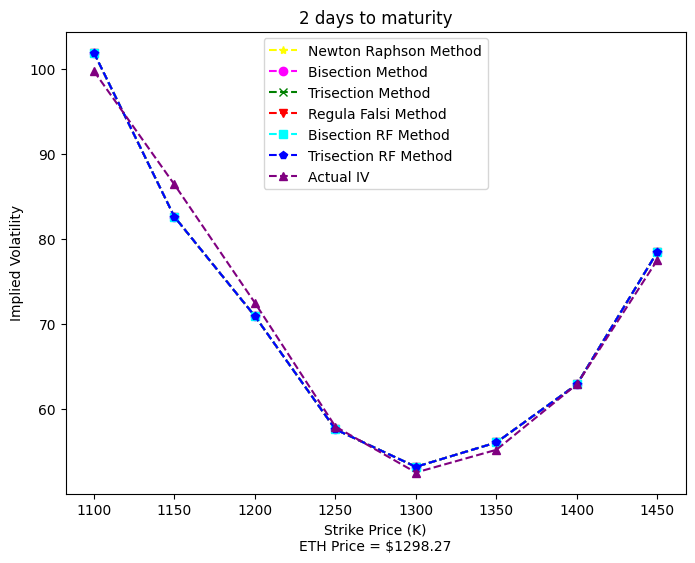

In [15]:
import math
import time
K = [1100,1150,1200,1250,1300,1350,1400,1450]
S = 1298.27
r = 0
tau = 1.694/365
Cm = [0.1529*S, 0.1145*S, 0.0767*S, 0.0406*S, 0.0138*S, 0.0031*S, 0.0007*S, 0.0004*S]
cNR, sigNR, t1 = ImpliedVolatilityNR('c',Cm,S,K,tau,r)
print('Newton-Raphson Method')
print(cNR)
print(sigNR)
print(t1)
cBM, sigBM, t1, l, u = ImpliedVolatilityBM('c',Cm,S,K,tau,r)
print('Bisection Method')
print(cBM)
print(sigBM)
print(t1)
print(l)
print(u)
cTrM, sigTrM, t1, l, u = ImpliedVolatilityTrM('c',Cm,S,K,tau,r)
print('Trisection Method')
print(cTrM)
print(sigTrM)
print(t1)
print(l)
print(u)
cRfM, sigRfM, t1, l, u = ImpliedVolatilityRfM('c',Cm,S,K,tau,r)
print('Regula-Falsi Method')
print(cRfM)
print(sigRfM)
print(t1)
print(l)
print(u)
cBRfM, sigBRfM, t1, l, u = ImpliedVolatilityBRfM('c',Cm,S,K,tau,r)
print('Bisection-Regula Falsi Method')
print(cBRfM)
print(sigBRfM)
print(t1)
print(l)
print(u)
cTRfM, sigTRfM, t1, l, u = ImpliedVolatilityTRfM('c',Cm,S,K,tau,r)
print('Trisection-Regula Falsi Method')
print(cTRfM)
print(sigTRfM)
print(t1)
print(l)
print(u)
IV = [99.78, 86.42, 72.48, 57.9, 52.49, 55.17, 62.89, 77.55]
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8,6)
plt.plot(K,np.array(sigNR)*100,'*--',color = "yellow")
plt.plot(K,np.array(sigBM)*100,'o--',color = "magenta")
plt.plot(K,np.array(sigTrM)*100, 'x--', color = "green")
plt.plot(K,np.array(sigRfM)*100, 'v--',color = "red")
plt.plot(K,np.array(sigBRfM)*100, 's--',color = "cyan")
plt.plot(K,np.array(sigTRfM)*100, 'p--',color = "blue")
plt.plot(K,IV, '^--', color = "purple")
plt.title('2 days to maturity')
plt.legend(['Newton Raphson Method','Bisection Method', 'Trisection Method', 'Regula Falsi Method', 'Bisection RF Method','Trisection RF Method','Actual IV'], loc = 'upper center')
plt.xlabel('Strike Price (K)\nETH Price = $1298.27')
plt.ylabel('Implied Volatility')
error = list(np.array(sigNR)*100 - np.array(IV))
error = [x/100 for x in error]
print('RMSE Newton Raphson Method = ',error)
error = list(np.array(sigBM)*100 - np.array(IV))
error = [x/100 for x in error]
print('RMSE Bisection Method = ',error)
error = list(np.array(sigTrM)*100 - np.array(IV))
error = [x/100 for x in error]
print('RMSE Trisection Method = ',error)
error = list(np.array(sigRfM)*100 - np.array(IV))
error = [x/100 for x in error]
print('RMSE Regula Falsi Method = ',error)
error = list(np.array(sigBRfM)*100 - np.array(IV))
error = [x/100 for x in error]
print('RMSE Bisection Regula Falsi Method = ',error)
error = list(np.array(sigTRfM)*100 - np.array(IV))
error = [x/100 for x in error]
print('RMSE Trisection Regula Falsi Method = ',error)

**Day 1**

Newton-Raphson Method
[8, 7, 7, 5, 3, 5, 6, 8]
[0.901131897740057, 0.6778412098384483, 0.5589535070998992, 0.5441243484154925, 0.5154254173698932, 0.5172201641655697, 0.6443471173478263, 0.7839926920577204]
[0.004349708557128906, 0.0034377574920654297, 0.003407001495361328, 0.002351522445678711, 0.0014848709106445312, 0.002439260482788086, 0.0030913352966308594, 0.004111289978027344]
Bisection Method
[20, 23, 24, 25, 26, 24, 23, 22]
[0.9011316299438477, 0.677841305732727, 0.558953583240509, 0.5441243946552277, 0.5154254287481308, 0.5172201991081238, 0.644347071647644, 0.7839930057525635]
[0.02858114242553711, 0.016422271728515625, 0.016558408737182617, 0.01719379425048828, 0.03191041946411133, 0.029987335205078125, 0.013590335845947266, 0.015349388122558594]
[0.9011316299438477, 0.6778407096862793, 0.5589532852172852, 0.5441242456436157, 0.5154253542423248, 0.5172199010848999, 0.644347071647644, 0.783991813659668]
[0.9011363983154297, 0.677841305732727, 0.558953583240509, 0.54412439465

<ipython-input-6-ce3f78530906>:6: RuntimeWarning: divide by zero encountered in scalar divide
  d1 = (np.log(S / float(K)) + (r + 0.5 * np.power(sigma,2.0)) * tau) / float(sigma * np.sqrt(tau))


Trisection Method
[13, 15, 15, 7, 16, 16, 16, 15]
[0.9011317029234354, 0.6778411763348945, 0.5589533753337449, 0.5441243712848651, 0.5154254373985885, 0.5172201153253927, 0.6443471036969344, 0.783992815620033]
[0.025144100189208984, 0.03365683555603027, 0.03313279151916504, 0.00844264030456543, 0.019379138946533203, 0.022886276245117188, 0.036182403564453125, 0.02810525894165039]
[0.9011254306686913, 0.6778404794177008, 0.558953026875148, 0.541838134430727, 0.5154253212457228, 0.5172198830196614, 0.6443469875440687, 0.7839921187028392]
[0.9011348390508073, 0.6778415247934914, 0.5589540722509386, 0.5486968449931413, 0.5154256697043197, 0.5172202314782582, 0.6443473360026656, 0.78399316407863]
Regula-Falsi Method
[92, 94, 46, 13, 3, 15, 31, 135]
[0.9011315757366368, 0.6778409455999684, 0.5589534033485056, 0.5441243105720888, 0.5154254171576916, 0.5172201376854526, 0.6443470311548709, 0.7839923094017122]
[0.10003805160522461, 0.12912201881408691, 0.05157589912414551, 0.014573812484741211,

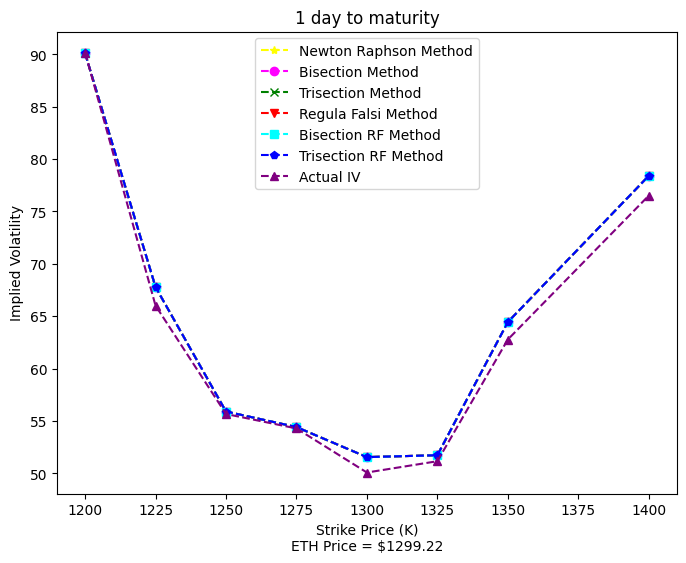

In [16]:
import math
import time
K = [1200,1225,1250,1275,1300,1325,1350,1400]
S = 1299.22
r = 0
tau = 0.714/365
Cm = [0.0767*S, 0.0574*S, 0.0385*S, 0.0216*S, 0.0088*S, 0.0025*S, 0.0012*S, 0.0002*S]
cNR, sigNR, t1 = ImpliedVolatilityNR('c',Cm,S,K,tau,r)
print('Newton-Raphson Method')
print(cNR)
print(sigNR)
print(t1)
cBM, sigBM, t1, l, u = ImpliedVolatilityBM('c',Cm,S,K,tau,r)
print('Bisection Method')
print(cBM)
print(sigBM)
print(t1)
print(l)
print(u)
cTrM, sigTrM, t1, l, u = ImpliedVolatilityTrM('c',Cm,S,K,tau,r)
print('Trisection Method')
print(cTrM)
print(sigTrM)
print(t1)
print(l)
print(u)
cRfM, sigRfM, t1, l, u = ImpliedVolatilityRfM('c',Cm,S,K,tau,r)
print('Regula-Falsi Method')
print(cRfM)
print(sigRfM)
print(t1)
print(l)
print(u)
cBRfM, sigBRfM, t1, l, u = ImpliedVolatilityBRfM('c',Cm,S,K,tau,r)
print('Bisection-Regula Falsi Method')
print(cBRfM)
print(sigBRfM)
print(t1)
print(l)
print(u)
cTRfM, sigTRfM, t1, l, u = ImpliedVolatilityTRfM('c',Cm,S,K,tau,r)
print('Trisection-Regula Falsi Method')
print(cTRfM)
print(sigTRfM)
print(t1)
print(l)
print(u)
IV = [90.18, 66.01, 55.66, 54.28, 50.07, 51.15, 62.77, 76.51]
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8,6)
plt.plot(K,np.array(sigNR)*100,'*--',color = "yellow")
plt.plot(K,np.array(sigBM)*100,'o--',color = "magenta")
plt.plot(K,np.array(sigTrM)*100, 'x--', color = "green")
plt.plot(K,np.array(sigRfM)*100, 'v--',color = "red")
plt.plot(K,np.array(sigBRfM)*100, 's--',color = "cyan")
plt.plot(K,np.array(sigTRfM)*100, 'p--',color = "blue")
plt.plot(K,IV, '^--', color = "purple")
plt.title('1 day to maturity')
plt.legend(['Newton Raphson Method','Bisection Method', 'Trisection Method', 'Regula Falsi Method', 'Bisection RF Method','Trisection RF Method','Actual IV'], loc = 'upper center')
plt.xlabel('Strike Price (K)\nETH Price = $1299.22')
plt.ylabel('Implied Volatility')
error = list(np.array(sigNR)*100 - np.array(IV))
error = [x/100 for x in error]
print('RMSE Newton Raphson Method = ',error)
error = list(np.array(sigBM)*100 - np.array(IV))
error = [x/100 for x in error]
print('RMSE Bisection Method = ',error)
error = list(np.array(sigTrM)*100 - np.array(IV))
error = [x/100 for x in error]
print('RMSE Trisection Method = ',error)
error = list(np.array(sigRfM)*100 - np.array(IV))
error = [x/100 for x in error]
print('RMSE Regula Falsi Method = ',error)
error = list(np.array(sigBRfM)*100 - np.array(IV))
error = [x/100 for x in error]
print('RMSE Bisection Regula Falsi Method = ',error)
error = list(np.array(sigTRfM)*100 - np.array(IV))
error = [x/100 for x in error]
print('RMSE Trisection Regula Falsi Method = ',error)

## **High Volatility Case**

**Day 2**

Newton-Raphson Method
[7, 7, 6, 6, 5, 4, 3, 4, 5, 6, 7]
[2.29779081203697, 2.110141070785868, 2.015043794598065, 1.850930878269587, 1.676145803767222, 1.5152069509070552, 1.3659923212047282, 1.2818116350357975, 1.2355718378503822, 1.245470898252053, 1.2907438847364838]
[0.004838228225708008, 0.003842592239379883, 0.003287076950073242, 0.0029439926147460938, 0.002424955368041992, 0.0019497871398925781, 0.0014493465423583984, 0.0019257068634033203, 0.002589702606201172, 0.003074169158935547, 0.0034399032592773438]


<ipython-input-6-ce3f78530906>:6: RuntimeWarning: divide by zero encountered in scalar divide
  d1 = (np.log(S / float(K)) + (r + 0.5 * np.power(sigma,2.0)) * tau) / float(sigma * np.sqrt(tau))


Bisection Method
[23, 25, 24, 25, 22, 26, 27, 27, 24, 24, 23]
[2.2977906465530396, 2.1101410686969757, 2.015043795108795, 1.8509308993816376, 1.6761457920074463, 1.5152069181203842, 1.3659923151135445, 1.2818116322159767, 1.235571801662445, 1.245470941066742, 1.2907439470291138]
[0.017021894454956055, 0.016631126403808594, 0.014803886413574219, 0.028369665145874023, 0.017100811004638672, 0.026996850967407227, 0.024272680282592773, 0.02072429656982422, 0.017398595809936523, 0.01496577262878418, 0.02174544334411621]
[2.2977906465530396, 2.1101410686969757, 2.0150434970855713, 1.8509307503700256, 1.6761457920074463, 1.5152069181203842, 1.3659923151135445, 1.2818116322159767, 1.235571801662445, 1.245470643043518, 1.290743350982666]
[2.2977912425994873, 2.1101412177085876, 2.015043795108795, 1.8509308993816376, 1.6761469841003418, 1.5152069926261902, 1.3659923523664474, 1.2818116694688797, 1.235572099685669, 1.245470941066742, 1.2907439470291138]
Trisection Method
[15, 16, 15, 14, 15, 16, 1

<ipython-input-6-ce3f78530906>:36: RuntimeWarning: divide by zero encountered in scalar divide
  xF =  a - (fa*(b-a))/(fb - fa)
<ipython-input-6-ce3f78530906>:6: RuntimeWarning: invalid value encountered in scalar divide
  d1 = (np.log(S / float(K)) + (r + 0.5 * np.power(sigma,2.0)) * tau) / float(sigma * np.sqrt(tau))


Trisection-Regula Falsi Method
[28, 9, 56, 9, 9, 9, 9, 8, 9, 11, 10]
[2.2977908120369963, 2.110141070785841, 2.0150437945980815, 1.8509308782695877, 1.676145803767231, 1.5152069509070598, 1.3659923212047302, 1.2818116350357955, 1.235571837850378, 1.2454708982520524, 1.290743884736483]
[0.04367947578430176, 0.01648545265197754, 0.10904598236083984, 0.016119718551635742, 0.015788793563842773, 0.013576030731201172, 0.013893604278564453, 0.017543315887451172, 0.015533208847045898, 0.01678943634033203, 0.016667842864990234]
[2.2977909275646144, 2.1101410707858, 2.015043840270124, 1.8509308782668308, 1.6761458037670671, 1.5152069509070571, 1.3659923212047302, 1.281811635035787, 1.2355718378503757, 1.2454708982520508, 1.2907438847364725]
[2.297790812036977, 2.1101410707858466, 2.015043794564023, 1.8509308782695892, 1.6761458037672394, 1.5152069509070651, 1.3659923212047311, 1.2818116350357973, 1.2355718378503826, 1.2454708982520553, 1.2907438847364883]
RMSE Newton Raphson Method =  [0.0610908

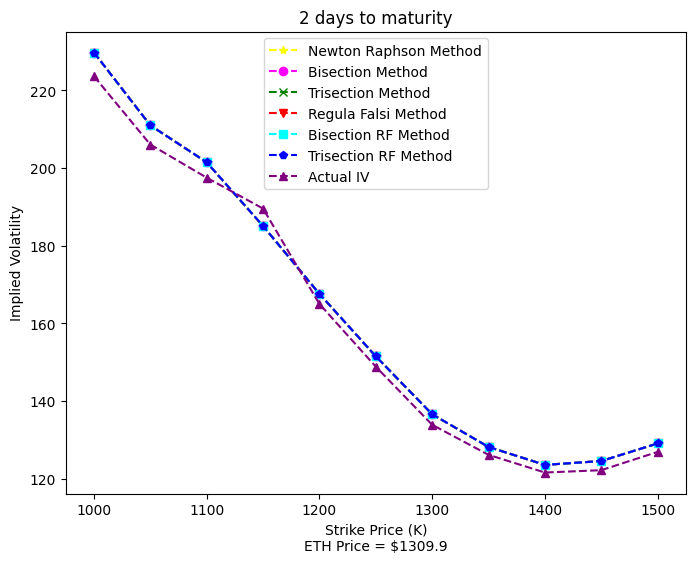

In [17]:
import math
import time
K = [1000, 1050, 1100, 1150, 1200, 1250, 1300, 1350, 1400, 1450, 1500]
S = 1309.9
r = 0
tau = 1.57/365
Cm = [0.2385*S, 0.2013*S, 0.1655*S, 0.1303*S, 0.0966*S, 0.0658*S, 0.0395*S, 0.0209*S, 0.0097*S, 0.0044*S, 0.0021*S]
cNR, sigNR, t1 = ImpliedVolatilityNR('c',Cm,S,K,tau,r)
print('Newton-Raphson Method')
print(cNR)
print(sigNR)
print(t1)
cBM, sigBM, t1, l, u = ImpliedVolatilityBM('c',Cm,S,K,tau,r)
print('Bisection Method')
print(cBM)
print(sigBM)
print(t1)
print(l)
print(u)
cTrM, sigTrM, t1, l, u = ImpliedVolatilityTrM('c',Cm,S,K,tau,r)
print('Trisection Method')
print(cTrM)
print(sigTrM)
print(t1)
print(l)
print(u)
cRfM, sigRfM, t1, l, u = ImpliedVolatilityRfM('c',Cm,S,K,tau,r)
print('Regula-Falsi Method')
print(cRfM)
print(sigRfM)
print(t1)
print(l)
print(u)
cBRfM, sigBRfM, t1, l, u = ImpliedVolatilityBRfM('c',Cm,S,K,tau,r)
print('Bisection-Regula Falsi Method')
print(cBRfM)
print(sigBRfM)
print(t1)
print(l)
print(u)
cTRfM, sigTRfM, t1, l, u = ImpliedVolatilityTRfM('c',Cm,S,K,tau,r)
print('Trisection-Regula Falsi Method')
print(cTRfM)
print(sigTRfM)
print(t1)
print(l)
print(u)
IV = [223.67, 206.07, 197.54, 189.58, 165.01, 148.86, 133.89, 126.15, 121.59, 122.19, 126.9]
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8,6)
plt.plot(K,np.array(sigNR)*100,'*--',color = "yellow")
plt.plot(K,np.array(sigBM)*100,'o--',color = "magenta")
plt.plot(K,np.array(sigTrM)*100, 'x--', color = "green")
plt.plot(K,np.array(sigRfM)*100, 'v--',color = "red")
plt.plot(K,np.array(sigBRfM)*100, 's--',color = "cyan")
plt.plot(K,np.array(sigTRfM)*100, 'p--',color = "blue")
plt.plot(K,IV, '^--', color = "purple")
plt.title('2 days to maturity')
plt.legend(['Newton Raphson Method','Bisection Method', 'Trisection Method', 'Regula Falsi Method', 'Bisection RF Method','Trisection RF Method','Actual IV'], loc = 'upper center')
plt.xlabel('Strike Price (K)\nETH Price = $1309.9')
plt.ylabel('Implied Volatility')
error = list(np.array(sigNR)*100 - np.array(IV))
error = [x/100 for x in error]
print('RMSE Newton Raphson Method = ',error)
error = list(np.array(sigBM)*100 - np.array(IV))
error = [x/100 for x in error]
print('RMSE Bisection Method = ',error)
error = list(np.array(sigTrM)*100 - np.array(IV))
error = [x/100 for x in error]
print('RMSE Trisection Method = ',error)
error = list(np.array(sigRfM)*100 - np.array(IV))
error = [x/100 for x in error]
print('RMSE Regula Falsi Method = ',error)
error = list(np.array(sigBRfM)*100 - np.array(IV))
error = [x/100 for x in error]
print('RMSE Bisection Regula Falsi Method = ',error)
error = list(np.array(sigTRfM)*100 - np.array(IV))
error = [x/100 for x in error]
print('RMSE Trisection Regula Falsi Method = ',error)

**Day 1**

Newton-Raphson Method
[7, 7, 6, 5, 4, 3, 5, 7, 8, 9]
[2.907330882327443, 2.585158033332241, 2.257319569233809, 1.9867322660100806, 1.7124395389871683, 1.4391378780538306, 1.270488706996487, 1.331457629608883, 1.459587978161695, 1.4802732084481605]
[0.00395655632019043, 0.0038743019104003906, 0.0035305023193359375, 0.0029485225677490234, 0.0023522377014160156, 0.0017633438110351562, 0.0028998851776123047, 0.004053831100463867, 0.004580020904541016, 0.005173206329345703]
Bisection Method
[21, 24, 22, 24, 25, 25, 25, 23, 22, 18]
[2.9073309898376465, 2.585158050060272, 2.257319688796997, 1.9867321848869324, 1.7124395072460175, 1.4391379058361053, 1.2704886496067047, 1.331457495689392, 1.459587812423706, 1.4802742004394531]
[0.014206171035766602, 0.014602184295654297, 0.0174558162689209, 0.015073299407958984, 0.018611431121826172, 0.018141746520996094, 0.01765584945678711, 0.016015291213989258, 0.016037464141845703, 0.014295101165771484]
[2.9073286056518555, 2.5851577520370483, 2.2573184967

<ipython-input-6-ce3f78530906>:6: RuntimeWarning: divide by zero encountered in scalar divide
  d1 = (np.log(S / float(K)) + (r + 0.5 * np.power(sigma,2.0)) * tau) / float(sigma * np.sqrt(tau))


Trisection Method
[15, 14, 14, 16, 14, 15, 15, 14, 12, 13]
[2.9073308510536724, 2.585157879969534, 2.2573196690172987, 1.986732276309734, 1.7124394910357978, 1.4391378381642592, 1.270488755694075, 1.3314575110146019, 1.4595881762980276, 1.4802740724432877]
[0.021008014678955078, 0.02416396141052246, 0.016906261444091797, 0.020531654357910156, 0.017276763916015625, 0.018337488174438477, 0.019895315170288086, 0.024389028549194336, 0.01668238639831543, 0.02634882926940918]
[2.907330154136479, 2.585156834593743, 2.257318623641508, 1.9867321601568682, 1.7124384456600072, 1.4391374897056621, 1.2704880587768812, 1.3314554202630207, 1.4595787679159118, 1.480267800188544]
[2.9073311995122695, 2.585159970721115, 2.25732175976888, 1.986732508615465, 1.7124415817873793, 1.4391385350814527, 1.2704891041526718, 1.3314585563903927, 1.459606993062259, 1.4802772085706597]
Regula-Falsi Method
[30, 26, 21, 14, 8, 4, 14, 36, 78, 236]
[2.907330617785226, 2.5851578380739433, 2.257319476663151, 1.98673220902

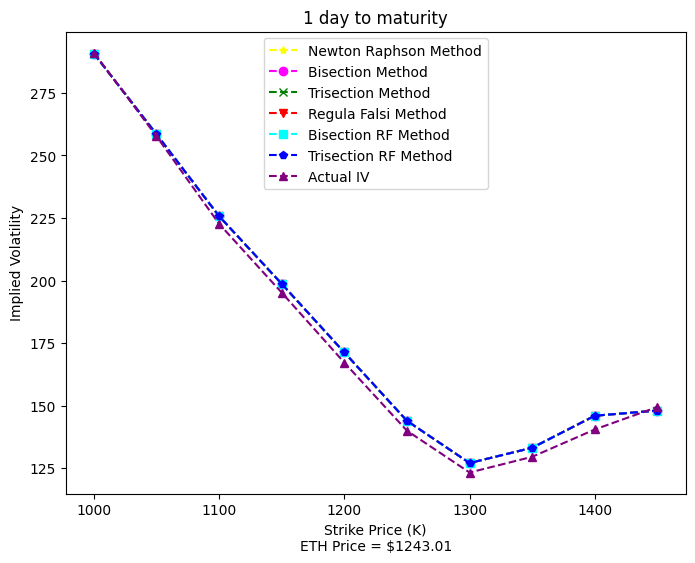

In [18]:
import math
import time
K = [1000, 1050, 1100, 1150, 1200, 1250, 1300, 1350, 1400, 1450]
S = 1243.01
r = 0
tau = 0.593/365
Cm = [0.1968*S, 0.1574*S, 0.1186*S, 0.0816*S, 0.0478*S, 0.0205*S, 0.0055*S, 0.0015*S, 0.0005*S, 0.0001*S]
cNR, sigNR, t1 = ImpliedVolatilityNR('c',Cm,S,K,tau,r)
print('Newton-Raphson Method')
print(cNR)
print(sigNR)
print(t1)
cBM, sigBM, t1, l, u = ImpliedVolatilityBM('c',Cm,S,K,tau,r)
print('Bisection Method')
print(cBM)
print(sigBM)
print(t1)
print(l)
print(u)
cTrM, sigTrM, t1, l, u = ImpliedVolatilityTrM('c',Cm,S,K,tau,r)
print('Trisection Method')
print(cTrM)
print(sigTrM)
print(t1)
print(l)
print(u)
cRfM, sigRfM, t1, l, u = ImpliedVolatilityRfM('c',Cm,S,K,tau,r)
print('Regula-Falsi Method')
print(cRfM)
print(sigRfM)
print(t1)
print(l)
print(u)
cBRfM, sigBRfM, t1, l, u = ImpliedVolatilityBRfM('c',Cm,S,K,tau,r)
print('Bisection-Regula Falsi Method')
print(cBRfM)
print(sigBRfM)
print(t1)
print(l)
print(u)
cTRfM, sigTRfM, t1, l, u = ImpliedVolatilityTRfM('c',Cm,S,K,tau,r)
print('Trisection-Regula Falsi Method')
print(cTRfM)
print(sigTRfM)
print(t1)
print(l)
print(u)
IV = [291.15, 257.7, 222.67, 195.17, 167.18, 139.96, 123.25, 129.54, 140.47, 149.46]
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8,6)
plt.plot(K,np.array(sigNR)*100,'*--',color = "yellow")
plt.plot(K,np.array(sigBM)*100,'o--',color = "magenta")
plt.plot(K,np.array(sigTrM)*100, 'x--', color = "green")
plt.plot(K,np.array(sigRfM)*100, 'v--',color = "red")
plt.plot(K,np.array(sigBRfM)*100, 's--',color = "cyan")
plt.plot(K,np.array(sigTRfM)*100, 'p--',color = "blue")
plt.plot(K,IV, '^--', color = "purple")
plt.title('1 day to maturity')
plt.legend(['Newton Raphson Method','Bisection Method', 'Trisection Method', 'Regula Falsi Method', 'Bisection RF Method','Trisection RF Method','Actual IV'], loc = 'upper center')
plt.xlabel('Strike Price (K)\nETH Price = $1243.01')
plt.ylabel('Implied Volatility')
error = list(np.array(sigNR)*100 - np.array(IV))
error = [x/100 for x in error]
print('RMSE Newton Raphson Method = ',error)
error = list(np.array(sigBM)*100 - np.array(IV))
error = [x/100 for x in error]
print('RMSE Bisection Method = ',error)
error = list(np.array(sigTrM)*100 - np.array(IV))
error = [x/100 for x in error]
print('RMSE Trisection Method = ',error)
error = list(np.array(sigRfM)*100 - np.array(IV))
error = [x/100 for x in error]
print('RMSE Regula Falsi Method = ',error)
error = list(np.array(sigBRfM)*100 - np.array(IV))
error = [x/100 for x in error]
print('RMSE Bisection Regula Falsi Method = ',error)
error = list(np.array(sigTRfM)*100 - np.array(IV))
error = [x/100 for x in error]
print('RMSE Trisection Regula Falsi Method = ',error)